<a href="https://colab.research.google.com/github/adityakshay/Machine-Learning/blob/master/classification_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start of Classification Exercise

In [0]:
actuals = [1,0,0,1,1] 

In [0]:
predicted =  [0,0,0,0,0]

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
cm = confusion_matrix(actuals, predicted)

In [0]:
print(cm)

[[2 0]
 [3 0]]


In [0]:
tn, fp, fn, tp = confusion_matrix(actuals, predicted).ravel()
(tn, fp, fn, tp)

(2, 0, 3, 0)

In [0]:
from sklearn.metrics import fbeta_score

In [0]:
fbeta_score(actuals, predicted, average=None, beta= 0.5)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.45454545, 0.        ])

# Start of implementation on Breast Cancer Data

In [0]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [0]:
data1 = load_breast_cancer()

In [0]:
data1.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
print(data1.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [0]:
df = pd.DataFrame(data1.data)

In [0]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
df.columns=data1.feature_names 

In [0]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
df['has_cancer']=data1.target

In [0]:
df['has_cancer'].value_counts()

1    357
0    212
Name: has_cancer, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
y=df['has_cancer']

In [0]:
X=df.drop('has_cancer', axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
X_train.shape

(455, 30)

In [0]:
X_test.shape

(114, 30)

In [0]:
y_train.shape

(455,)

In [0]:
y_test.shape

(114,)

In [0]:
from sklearn.metrics import accuracy_score
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
  results = {}
  start = time()
  learner= learner.fit(X_train[:sample_size],y_train[:sample_size])
  end = time()
  
  results['train_time'] = end- start
  
  start = time()
  pred_test=learner.predict(X_test)
  pred_train=learner.predict(X_train)
  end= time()
  
  results['pred_time'] = end-start
  
  results['acc_train'] = accuracy_score(y_train, pred_train)
  results['acc_test'] = accuracy_score(y_test, pred_test)
  
  results['f_train'] = fbeta_score(y_train, pred_train, beta = 0.5)
  results['f_test'] = fbeta_score(y_test, pred_test, beta = 0.5)
  
  return(results)
  
  

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
model1=LogisticRegression(random_state=0)
model2=GradientBoostingClassifier(random_state=0)
model3=RandomForestClassifier(random_state=0)

In [0]:
results={}
sample_1=int(len(y_train)*0.05)
sample_10=int(len(y_train)*0.1)
sample_100=len(y_train)

for model in [model1, model2, model3]:
  # Getting model name
  model_name=model.__class__.__name__
  results[model_name]={}
  for i, samples in enumerate([sample_1, sample_10, sample_100]):
    results[model_name][i]=train_predict(model, samples, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
print(results)

{'LogisticRegression': {0: {'train_time': 0.01423025131225586, 'pred_time': 0.0061609745025634766, 'acc_train': 0.843956043956044, 'acc_test': 0.8157894736842105, 'f_train': 0.8650065530799476, 'f_test': 0.8357348703170029}, 1: {'train_time': 0.0032820701599121094, 'pred_time': 0.0017273426055908203, 'acc_train': 0.9186813186813186, 'acc_test': 0.9298245614035088, 'f_train': 0.917639429312581, 'f_test': 0.9259259259259259}, 2: {'train_time': 0.01264643669128418, 'pred_time': 0.0018429756164550781, 'acc_train': 0.9582417582417583, 'acc_test': 0.956140350877193, 'f_train': 0.9644322845417238, 'f_test': 0.9752321981424149}}, 'GradientBoostingClassifier': {0: {'train_time': 0.021983623504638672, 'pred_time': 0.0023686885833740234, 'acc_train': 0.9032967032967033, 'acc_test': 0.8947368421052632, 'f_train': 0.8957553058676654, 'f_test': 0.8746736292428198}, 1: {'train_time': 0.02919912338256836, 'pred_time': 0.002608060836791992, 'acc_train': 0.9384615384615385, 'acc_test': 0.938596491228070

In [0]:
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
def evaluate(results):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = pl.subplots(2, 3, figsize = (11,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    pl.tight_layout()
    pl.show()
    

def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = pl.figure(figsize = (9,5))
    pl.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    pl.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    pl.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    pl.xticks(np.arange(5), columns)
    pl.xlim((-0.5, 4.5))
    pl.ylabel("Weight", fontsize = 12)
    pl.xlabel("Feature", fontsize = 12)
    
    pl.legend(loc = 'upper center')
    pl.tight_layout()
    pl.show()  

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


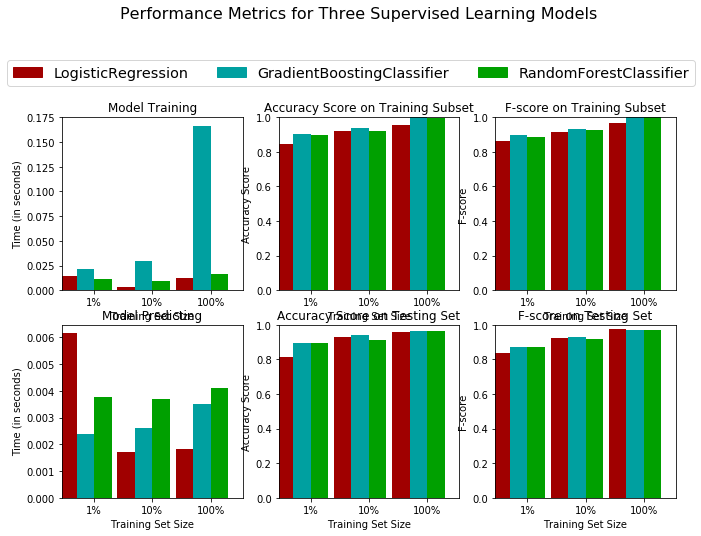

In [0]:
import numpy as np
evaluate(results)

In [0]:
model2_imp = model2.fit(X_train,y_train).feature_importances_

In [0]:
model3_imp = model3.fit(X_train, y_train).feature_importances_

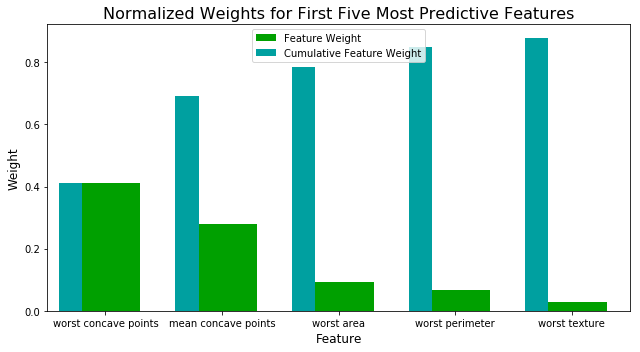

In [0]:
feature_plot(model2_imp, X_train, y_train)

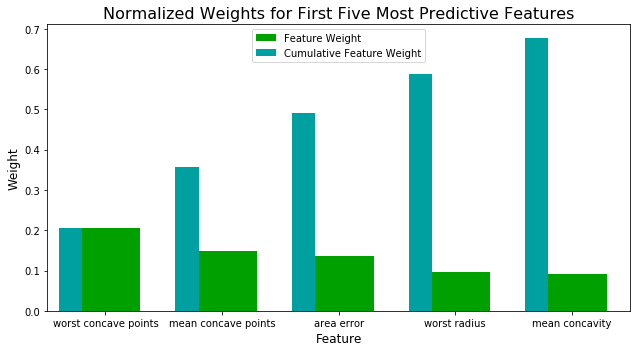

In [0]:
feature_plot(model3_imp, X_train, y_train)

In [0]:
y_train.value_counts()

1    290
0    165
Name: has_cancer, dtype: int64

In [0]:
290/(290+165)

0.6373626373626373

# Having k-fold cross validation

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import ShuffleSplit

In [0]:
mymodel = model2

In [0]:
parameters = {'learning_rate' : [0.1,0.4,0.5], 'max_depth': [2,3,4,5], 'min_samples_leaf': [1,2,3,4]}

In [0]:
scorer=make_scorer(fbeta_score, beta=0.5)

In [0]:
gridobj=GridSearchCV(estimator=mymodel, param_grid= parameters, scoring=scorer)

In [0]:
gridfit=gridobj.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [0]:
best_model=gridfit.best_estimator_

In [0]:
best_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
predictions=(mymodel.fit(X_train,y_train)).predict(X_test)

In [0]:
best_predictions=best_model.predict(X_test)

In [0]:
accuracy_score(y_test,predictions)

0.9649122807017544

In [0]:
accuracy_score(y_test, best_predictions)

0.9824561403508771

In [0]:
fbeta_score(y_test,predictions, beta=0.5)

0.9701492537313433

In [0]:
fbeta_score(y_test,best_predictions, beta=0.5)

0.9850746268656716

Feature Importances

In [0]:
best_model.feature_importances_

array([2.37205122e-07, 1.13605958e-02, 7.05044434e-05, 4.13180834e-03,
       2.40215533e-02, 2.13765774e-03, 3.54047765e-04, 1.91383401e-01,
       3.16173191e-04, 1.07537973e-04, 4.90933324e-03, 3.14027261e-03,
       1.47672187e-03, 1.95224589e-02, 8.34991919e-04, 1.22204290e-04,
       2.34570074e-07, 3.30699257e-05, 9.52102314e-07, 1.24614266e-03,
       1.82882059e-02, 1.87576314e-02, 3.05933931e-02, 1.21927099e-01,
       7.83804737e-04, 1.87670129e-03, 1.86792873e-02, 5.22795216e-01,
       9.69682436e-05, 1.03179442e-03])

In [0]:
fitmodel=mymodel.fit(X_train,y_train)

In [0]:
fitmodel.feature_importances_

array([4.86250041e-04, 1.50114461e-02, 4.86312789e-04, 1.10392404e-03,
       1.13555843e-02, 1.79830909e-03, 1.03170909e-03, 2.79562213e-01,
       8.40024982e-03, 5.00213843e-06, 4.88811828e-03, 3.25362495e-03,
       2.44787541e-03, 2.21172848e-02, 1.17286964e-03, 1.52965712e-03,
       4.80502830e-03, 3.56230098e-05, 1.13556410e-03, 3.57617050e-03,
       1.50178769e-02, 2.73852388e-02, 6.61305444e-02, 9.40252162e-02,
       1.08318591e-03, 3.80243226e-03, 1.52228908e-02, 4.11001259e-01,
       1.30045845e-04, 1.99849350e-03])

In [0]:
fitmodel.score(X_test,y_test)

0.9649122807017544

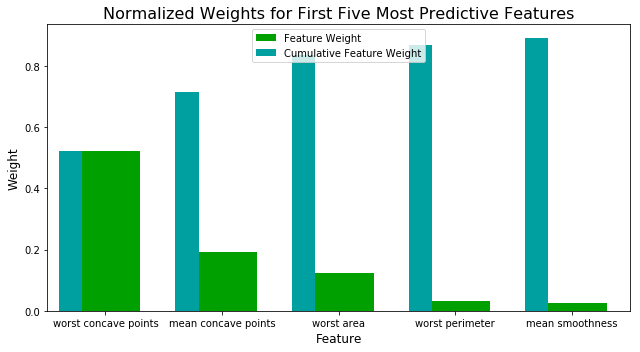

In [0]:
feature_plot(best_model.feature_importances_, X_train, y_train)

In [0]:
gridfit.cv_results_

{'mean_fit_time': array([0.09055217, 0.08785478, 0.08470893, 0.08635958, 0.12699978,
        0.12929543, 0.12369521, 0.12213977, 0.15985847, 0.15624873,
        0.15720781, 0.15787999, 0.14927872, 0.15969459, 0.17720143,
        0.18197974, 0.07688133, 0.07401919, 0.07136893, 0.07214832,
        0.06247616, 0.06001091, 0.06331952, 0.06237594, 0.05979562,
        0.05864867, 0.05916341, 0.06171934, 0.05747962, 0.05653405,
        0.06157676, 0.06250978, 0.06452219, 0.06444828, 0.06148163,
        0.06210256, 0.05687253, 0.05487251, 0.05357178, 0.05366007,
        0.05318324, 0.05438685, 0.05406411, 0.05380948, 0.05039716,
        0.05058583, 0.05290985, 0.0589939 ]),
 'mean_score_time': array([0.00260162, 0.00260162, 0.00262523, 0.00259026, 0.00268118,
        0.00269643, 0.00267466, 0.00270987, 0.00291785, 0.00275906,
        0.00276184, 0.00276613, 0.00268062, 0.00271948, 0.00278282,
        0.00283273, 0.00256252, 0.00256681, 0.00257969, 0.0027492 ,
        0.00259519, 0.0029823 , 0.

# Finding probability boundaries

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score

In [0]:
p1=model1.predict_proba(X_train)[:,1]
p2=model2.predict_proba(X_train)[:,1]
p3=model3.predict_proba(X_train)[:,1]
p4=best_model.predict_proba(X_train)[:,1]



In [0]:
np.set_printoptions(suppress=True)
p1

array([0.99500854, 0.87763942, 0.94678514, 0.99950819, 0.81532698,
       0.99584777, 0.99229772, 0.9982824 , 0.04735119, 0.99434538,
       0.00000003, 0.96253668, 0.43057711, 0.99959216, 0.9991816 ,
       0.99871596, 0.00000228, 0.98842021, 0.99790574, 0.88577847,
       0.9072291 , 0.99977987, 0.71475939, 0.07997589, 0.        ,
       0.9992869 , 0.99821238, 0.999542  , 0.        , 0.99475745,
       0.9988763 , 0.00000001, 0.94827268, 0.14818529, 0.98881937,
       0.9913228 , 0.99537342, 0.89394534, 0.94773084, 0.89480423,
       0.99919374, 0.030084  , 0.95777804, 0.02782224, 0.99732141,
       0.00000026, 0.00000075, 0.99712303, 0.7326305 , 0.00005369,
       0.99851774, 0.00614793, 0.014067  , 0.0006958 , 0.94625136,
       0.98691096, 0.99907703, 0.99727945, 0.99947331, 0.99202643,
       0.0011343 , 0.99814886, 0.99745448, 0.99432746, 0.99967756,
       0.01417991, 0.        , 0.92720475, 0.86772869, 0.00486041,
       0.99967764, 0.99917256, 0.7901091 , 0.99854894, 0.     

In [0]:
fpr, tpr, thresholds = roc_curve(y_train, p1)

In [0]:
print(fpr, tpr, thresholds)

[0.         0.         0.         0.00606061 0.00606061 0.01212121
 0.01212121 0.01818182 0.01818182 0.02424242 0.02424242 0.03636364
 0.03636364 0.04848485 0.04848485 0.07878788 0.07878788 0.09090909
 0.09090909 0.1030303  0.1030303  0.12727273 0.12727273 0.13333333
 0.13333333 0.13939394 0.13939394 1.        ] [0.         0.00344828 0.76896552 0.76896552 0.85517241 0.85517241
 0.92068966 0.92068966 0.95517241 0.95517241 0.95862069 0.95862069
 0.96206897 0.96206897 0.97241379 0.97241379 0.97931034 0.97931034
 0.98275862 0.98275862 0.98965517 0.98965517 0.99310345 0.99310345
 0.99655172 0.99655172 1.         1.        ] [1.99999008 0.99999008 0.95681811 0.95607611 0.91942047 0.91785456
 0.86772869 0.86293183 0.77405379 0.75914288 0.7326305  0.72280949
 0.71475939 0.68228232 0.62494652 0.47596189 0.43057711 0.4168656
 0.41488195 0.41064142 0.39020971 0.24697994 0.24473889 0.23343241
 0.21253385 0.17362063 0.16059925 0.        ]


In [0]:
auc1 = roc_auc_score(y_train, p1)
auc2 = roc_auc_score(y_train, p2)
auc3 = roc_auc_score(y_train, p3)
auc4 = roc_auc_score(y_train, p4)

In [0]:
print(auc1, auc2, auc3, auc4)

0.9943991640543365 1.0 0.9999895506792058 1.0


Creating AUC-ROC curve

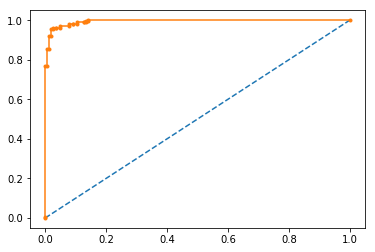

In [0]:
pl.plot([0,1],[0,1], linestyle='--')
pl.plot(fpr, tpr, marker='.')

In [0]:
fpr2, tpr2, thresholds2 = roc_curve(y_train, p2)
fpr3, tpr3, thresholds3 = roc_curve(y_train, p3)
fpr4, tpr4, thresholds4 = roc_curve(y_train, p4)

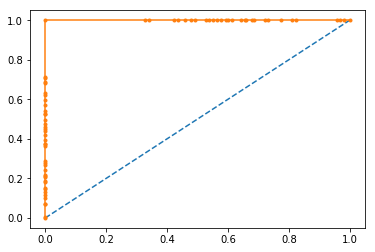

In [0]:
pl.plot([0,1],[0,1], linestyle='--')
pl.plot(fpr2, tpr2, marker='.')

In [0]:
thresholds2

array([1.99977503, 0.99977503, 0.99976072, 0.99975554, 0.99973995,
       0.99972921, 0.9997154 , 0.99971199, 0.99971145, 0.99970966,
       0.99969638, 0.99968699, 0.99966101, 0.99965955, 0.99960587,
       0.99959403, 0.99958258, 0.99955997, 0.99954675, 0.99953693,
       0.999515  , 0.99951137, 0.9994779 , 0.99946915, 0.99945883,
       0.99945852, 0.99945447, 0.99940868, 0.99940487, 0.99940377,
       0.9993844 , 0.99932654, 0.99928373, 0.99924629, 0.99924454,
       0.99908527, 0.99907206, 0.99888505, 0.99885058, 0.98288906,
       0.00126399, 0.00121805, 0.00096872, 0.00094028, 0.00084075,
       0.00077545, 0.00076109, 0.00064677, 0.00063704, 0.000586  ,
       0.0005859 , 0.00050214, 0.00050125, 0.00049071, 0.00048929,
       0.00044714, 0.00044667, 0.00044663, 0.000436  , 0.00042885,
       0.00042554, 0.00041408, 0.00041333, 0.00040868, 0.00040861,
       0.00039688, 0.0003836 , 0.00038154, 0.00032028])

In [0]:
cutoffs=np.linspace(0.01,0.99,99)

In [0]:
print(cutoffs)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99]


In [0]:
KS_all=[]

for cutoff in cutoffs:
  
  predicted=(p1>cutoff).astype(int)
  
  TP = ((predicted==1) & (y_train==1)).sum()
  FP = ((predicted==1) & (y_train==0)).sum()
  TN = ((predicted==0) & (y_train==0)).sum()
  FN = ((predicted==0) & (y_train==1)).sum()
  
  P=TP+FN
  N=TN+FP
        
  KS=(TP/P)-(FP/N)
        
  KS_all.append(KS)      
  

In [0]:
KS_all

[0.703030303030303,
 0.7515151515151515,
 0.7696969696969697,
 0.7818181818181819,
 0.793939393939394,
 0.793939393939394,
 0.8,
 0.806060606060606,
 0.8242424242424242,
 0.8363636363636364,
 0.8424242424242424,
 0.8484848484848485,
 0.8484848484848485,
 0.8484848484848485,
 0.8545454545454545,
 0.8606060606060606,
 0.8571577847439916,
 0.8632183908045977,
 0.8632183908045977,
 0.8632183908045977,
 0.8632183908045977,
 0.8597701149425288,
 0.8597701149425288,
 0.8658307210031349,
 0.8684430512016719,
 0.8684430512016719,
 0.8684430512016719,
 0.874503657262278,
 0.874503657262278,
 0.874503657262278,
 0.874503657262278,
 0.874503657262278,
 0.880564263322884,
 0.880564263322884,
 0.880564263322884,
 0.88662486938349,
 0.88662486938349,
 0.88662486938349,
 0.88662486938349,
 0.8831765935214211,
 0.8797283176593521,
 0.8944618599791013,
 0.9005224660397074,
 0.8970741901776385,
 0.8970741901776385,
 0.8970741901776385,
 0.8936259143155695,
 0.8996865203761755,
 0.8996865203761755,
 0.905

In [0]:
mycutoff = cutoffs[KS_all==max(KS_all)][0]
mycutoff

0.76

In [0]:
KS_all=[]

for cutoff in cutoffs:
  
  predicted=(p2>cutoff).astype(int)
  
  TP = ((predicted==1) & (y_train==1)).sum()
  FP = ((predicted==1) & (y_train==0)).sum()
  TN = ((predicted==0) & (y_train==0)).sum()
  FN = ((predicted==0) & (y_train==1)).sum()
  
  P=TP+FN
  N=TN+FP
        
  KS=(TP/P)-(FP/N)
        
  KS_all.append(KS)
  
mycutoff = cutoffs[KS_all==max(KS_all)][0]
mycutoff  

0.060000000000000005

In [0]:
train_pred = (p2>mycutoff).astype(int)

In [0]:
y_train.value_counts()

1    290
0    165
Name: has_cancer, dtype: int64

In [0]:
np.bincount(train_pred)

array([165, 290])